PROJECT OBJECTIVE IS TO TRAIN A MODEL THAT PREDICT BOOK RATING

1. INTRODUCTION
2. PROBLEM STATEMENT
3. DATA ANALYSIS 
4. FEATURES 
5. MACHINE LEARNING
6. CONCLUSION
7. HOSTING & DEPLOYMENT


INTRODUCTION


The project is presented as a Jupiter notebook. The work includes four blocks of the ML Pipeline path: Problem statement, Data Analysis (cleaning & EDA) , Features (Selection & Engeneering) and Machine learning (Model selection, comparison , evaluation).  
Data source: provided CSV file. 

The target column (average_rating) is detected for training the model. 
The dataset provided is a curation of Goodreads books based on real user information. 

Proper work with necessary comments is located in the Jupyter “DSTI_ML_Project.ipynb” file.


PROBLEM STATEMENT

With the existing data provided, is it possible to predict the rating of a book before being release? in other word if a new book is to be released soon, what are rating value could we expect?

A Model will help us predict future book rating 

I. DATA ANALYSIS

In [1]:
# importing libraries
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Loading dataset : Our data is available in a tabular format of CSV files. we'll use the convert it to a pandas DataFrame using the read_csv function

df = pd.read_csv('books.csv', warn_bad_lines=True, error_bad_lines=False, encoding='utf-8')

C:\Users\selfe\AppData\Local\Temp\ipykernel_27160\3584245437.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('books.csv', warn_bad_lines=True, error_bad_lines=False, encoding='utf-8')
C:\Users\selfe\AppData\Local\Temp\ipykernel_27160\3584245437.py:3: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('books.csv', warn_bad_lines=True, error_bad_lines=False, encoding='utf-8')
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


The dataset contains some rows with more columns than expected

In [3]:
#compare length of rows by recommended value:
RECOMMENDED = 12

with open('books.csv', encoding='utf-8') as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    for row in reader:
        if (len(row) != RECOMMENDED):
            print ("Length of row is: %r" % len(row) )
            print (row)

Length of row is: 13
['12224', 'Streetcar Suburbs: The Process of Growth in Boston  1870-1900', 'Sam Bass Warner', ' Jr./Sam B. Warner', '3.58', '0674842111', '9780674842113', 'en-US', '236', '61', '6', '4/20/2004', 'Harvard University Press']
Length of row is: 13
['16914', "The Tolkien Fan's Medieval Reader", 'David E. Smith (Turgon of TheOneRing.net', ' one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)', '3.58', '1593600119', '9781593600112', 'eng', '400', '26', '4', '4/6/2004', 'Cold Spring Press']
Length of row is: 13
['22128', 'Patriots (The Coming Collapse)', 'James Wesley', ' Rawles', '3.63', '156384155X', '9781563841552', 'eng', '342', '38', '4', '1/15/1999', 'Huntington House Publishers']
Length of row is: 13
['34889', "Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.", 'Brown', ' Son & Ferguson', '0.00', '0851742718', '9780

In [4]:
#compare length of rows by length of columns in df
lencols = len(df.columns)
print (lencols)

with open('books.csv', encoding='utf-8') as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    for row in reader:
        if (len(row) != lencols):
            print ("Length of row is: %r" % len(row) )
            print (row)

12
Length of row is: 13
['12224', 'Streetcar Suburbs: The Process of Growth in Boston  1870-1900', 'Sam Bass Warner', ' Jr./Sam B. Warner', '3.58', '0674842111', '9780674842113', 'en-US', '236', '61', '6', '4/20/2004', 'Harvard University Press']
Length of row is: 13
['16914', "The Tolkien Fan's Medieval Reader", 'David E. Smith (Turgon of TheOneRing.net', ' one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)', '3.58', '1593600119', '9781593600112', 'eng', '400', '26', '4', '4/6/2004', 'Cold Spring Press']
Length of row is: 13
['22128', 'Patriots (The Coming Collapse)', 'James Wesley', ' Rawles', '3.63', '156384155X', '9781563841552', 'eng', '342', '38', '4', '1/15/1999', 'Huntington House Publishers']
Length of row is: 13
['34889', "Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.", 'Brown', ' Son & Ferguson', '0.00', '0851742718', '9

we noticed that in the dataset, there were books with authors splited into 2 columns
We could have also used the i.loc function to extract the skkiped rows (df.iloc[3350]
We are skipping 4 rows, this will not considerably impact our model.

I.A DATA EXPLORATION

In [5]:
# Let's examine the first 5 entries:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
# Let's examine the last 10 entries:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [7]:
# prints information about the DataFrame with Pandas DataFrame info() Method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


- indexing is not optimal extra space in column('num_pages').
- dataset contains both numerical and categorical data types.
- 'title', 'authors' , 'publication_date', language_code', 'publisher' are categoricals variables.
- the 'publication_date' column has a data type of object. This is not correct.

In [8]:
#  check the number of rows and columns in the DataFrame
df.shape

(11123, 12)

we also need a summary statistics of columns in our DataFrame.


In [9]:
# Statistics on numerical columns
df.describe(exclude="object")

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [10]:
# the correlation between numerical columns
df.corr()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.036207,-0.002185,-0.026134,-0.076820,-0.081289
average_rating,-0.036207,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.002185,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,-0.026134,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,-0.076820,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,-0.081289,0.033663,0.008152,0.036977,0.865977,1.000000


As such it seems that there is hardly any mentionable corelation of any variable with the books ratings. So, it is important to study the individual relation.

The highest correlation (we excluded 'bookID') exists between 'text_reviews_count' and 'ratings_count', while the lowest correlation is between 'average_rating' and 'num_pages'

<AxesSubplot: >

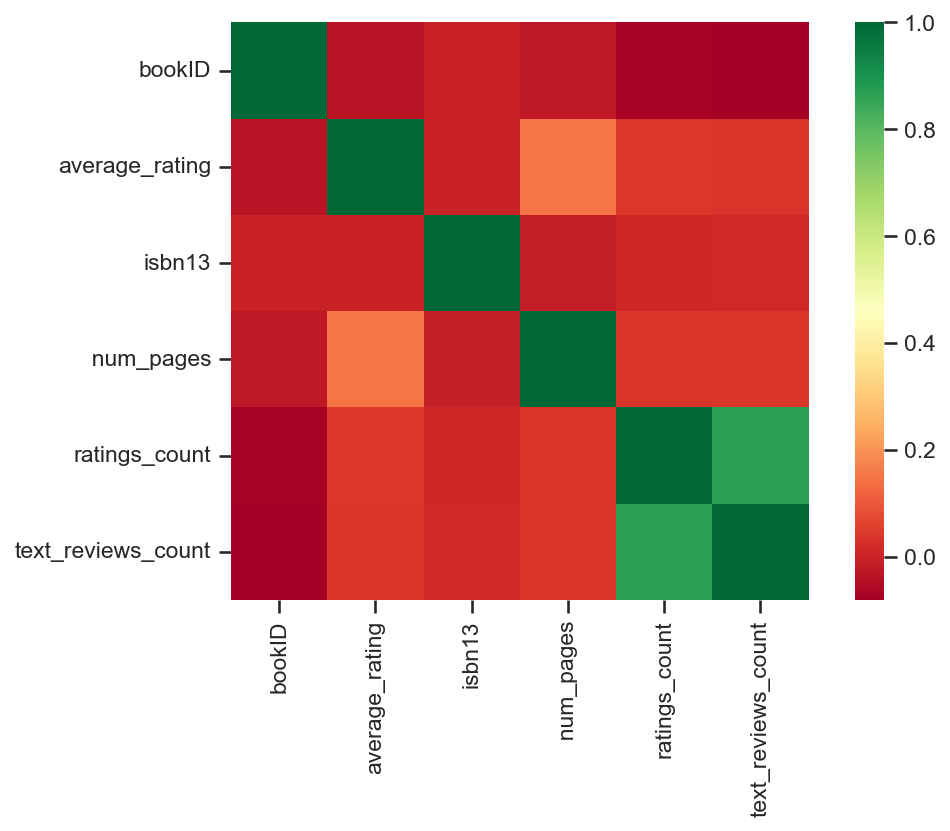

In [11]:
# figure1a : Let's plot a heatmap describing the correlation between the columns in the dataset

sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

#plotting heatmap for overall data set
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

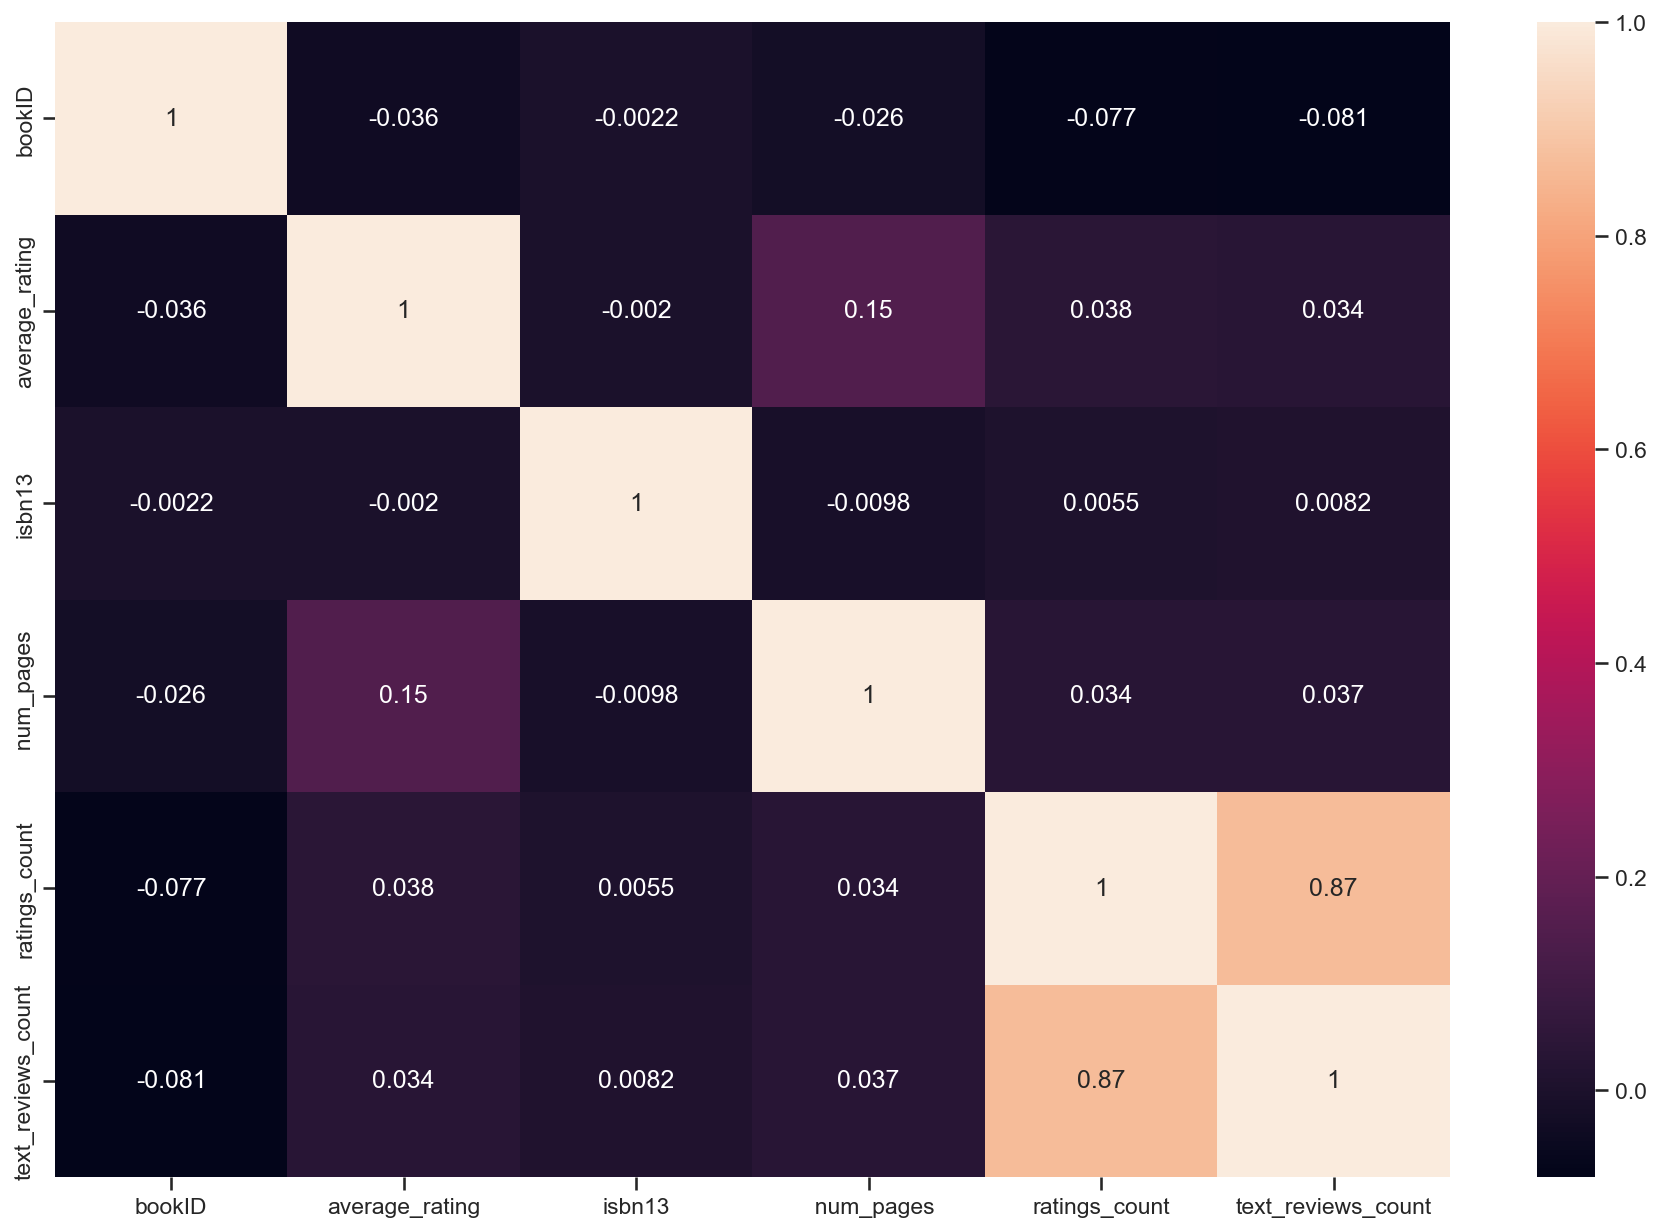

In [12]:
# figure1b : Let's plot a heatmap describing the correlation between the columns in the dataset
plt.subplots(figsize=(15,10))
heat = sns.heatmap(df.corr(),annot=True)

- Average rating: On an average, books average_rating is about 3.93. Also, Only 25 percentile of the books have ratings lower than 3.77 - a fact reflected in the standard deviation as well.

- Number of pages: Roughly we could say that number of pages are increasing with the increasing book ratings. But we need to verify the trend with more scientific means.

- Ratings count It seems that less than 25 percentile books have about 100 or lesser ratings count. In general, that could be considered as good aspect of the data. Since number of ratings can affect the quality of average ratings for any book.

- Text Review counts: Hypothetically, the written text reviews a book received can also be measure of confidence on the quality of ratings. Here first 25 percentile of the books have 9 or lesser text_review_counts whereas last 25 percentile of books have more than 238 text_count_reviews.

In [13]:
# Statistics on categorical columns
df.describe(include='object').T

,count,unique,top,freq
title,11123,10348,The Iliad,9
authors,11123,6639,Stephen King,40
isbn,11123,11123,0439785960,1
language_code,11123,27,eng,8908
publication_date,11123,3679,10/1/2005,56
publisher,11123,2290,Vintage,318


I.B DATA CLEANING 

In [14]:
# let's check if we have any missing values
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

<AxesSubplot: >

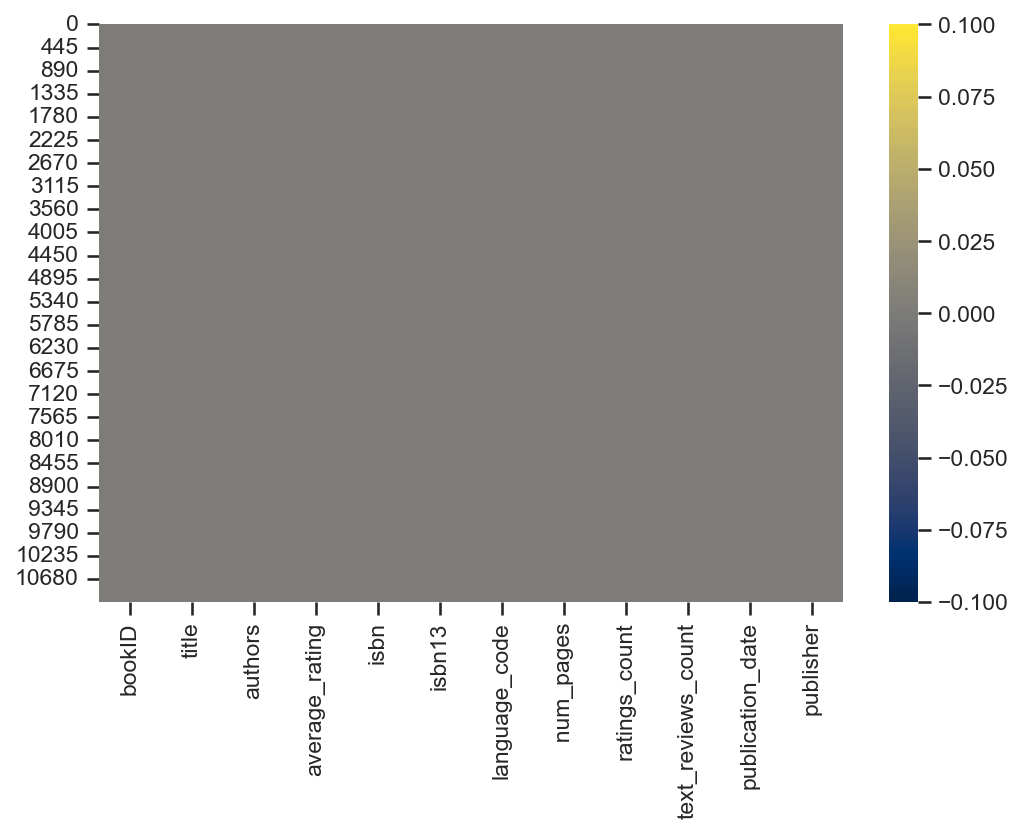

In [15]:
# figure2: empty values in visual
sns.heatmap(df.isnull(), cmap='cividis')

In [16]:
# let's check for duplicated
df.duplicated().any()

False

In [17]:
for feature in df.columns:
    uniq = np.unique(df[feature])
    print('{}: {} distinct values\n'.format(feature,len(uniq)))

bookID: 11123 distinct values

title: 10348 distinct values

authors: 6639 distinct values

average_rating: 209 distinct values

isbn: 11123 distinct values

isbn13: 11123 distinct values

language_code: 27 distinct values

  num_pages: 997 distinct values

ratings_count: 5294 distinct values

text_reviews_count: 1822 distinct values

publication_date: 3679 distinct values

publisher: 2290 distinct values



In [18]:
def statics(data):
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0],
                      data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage_of_missing_values',
                                            'Percentage_of_values_in_the_biggest category', 'type'])
    stats_df.sort_values('Percentage_of_missing_values', ascending=False, inplace=True)
    return stats_df
statics(df)

,Feature,Unique_values,Percentage_of_missing_values,Percentage_of_values_in_the_biggest category,type
0,bookID,11123,0.0,0.008990,int64
1,title,10348,0.0,0.080913,object
2,authors,6639,0.0,0.359615,object
3,average_rating,209,0.0,1.968893,float64
4,isbn,11123,0.0,0.008990,object
5,isbn13,11123,0.0,0.008990,int64
6,language_code,27,0.0,80.086308,object
7,num_pages,997,0.0,2.067787,int64
8,ratings_count,5294,0.0,0.737211,int64
9,text_reviews_count,1822,0.0,5.609997,int64


In [19]:
# look for duplicate in isbn
df['isbn'].nunique() & df['isbn13'].nunique()

11123

- Since lenght of columns "isbn & isbn13" are equal, we can say There is no duplicated found
- There is also no null data found


I.C FINDING INSIGHTS

C:\Users\selfe\AppData\Local\Temp\ipykernel_27160\3625968269.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['average_rating'], shade = True)


Text(0, 0.5, 'Frequency')

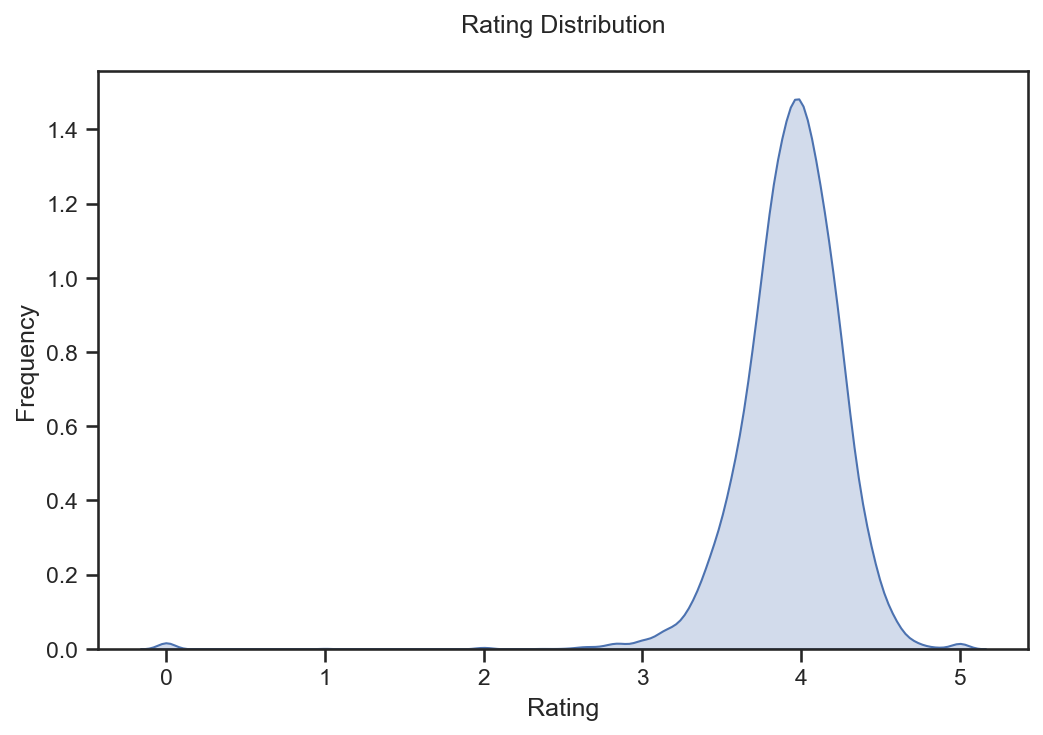

In [20]:
# figure3: ratings distribution

sns.kdeplot(df['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [22]:
#rename columns ' num_pages'
df.rename(columns={'  num_pages':'num_pages'},inplace=True)

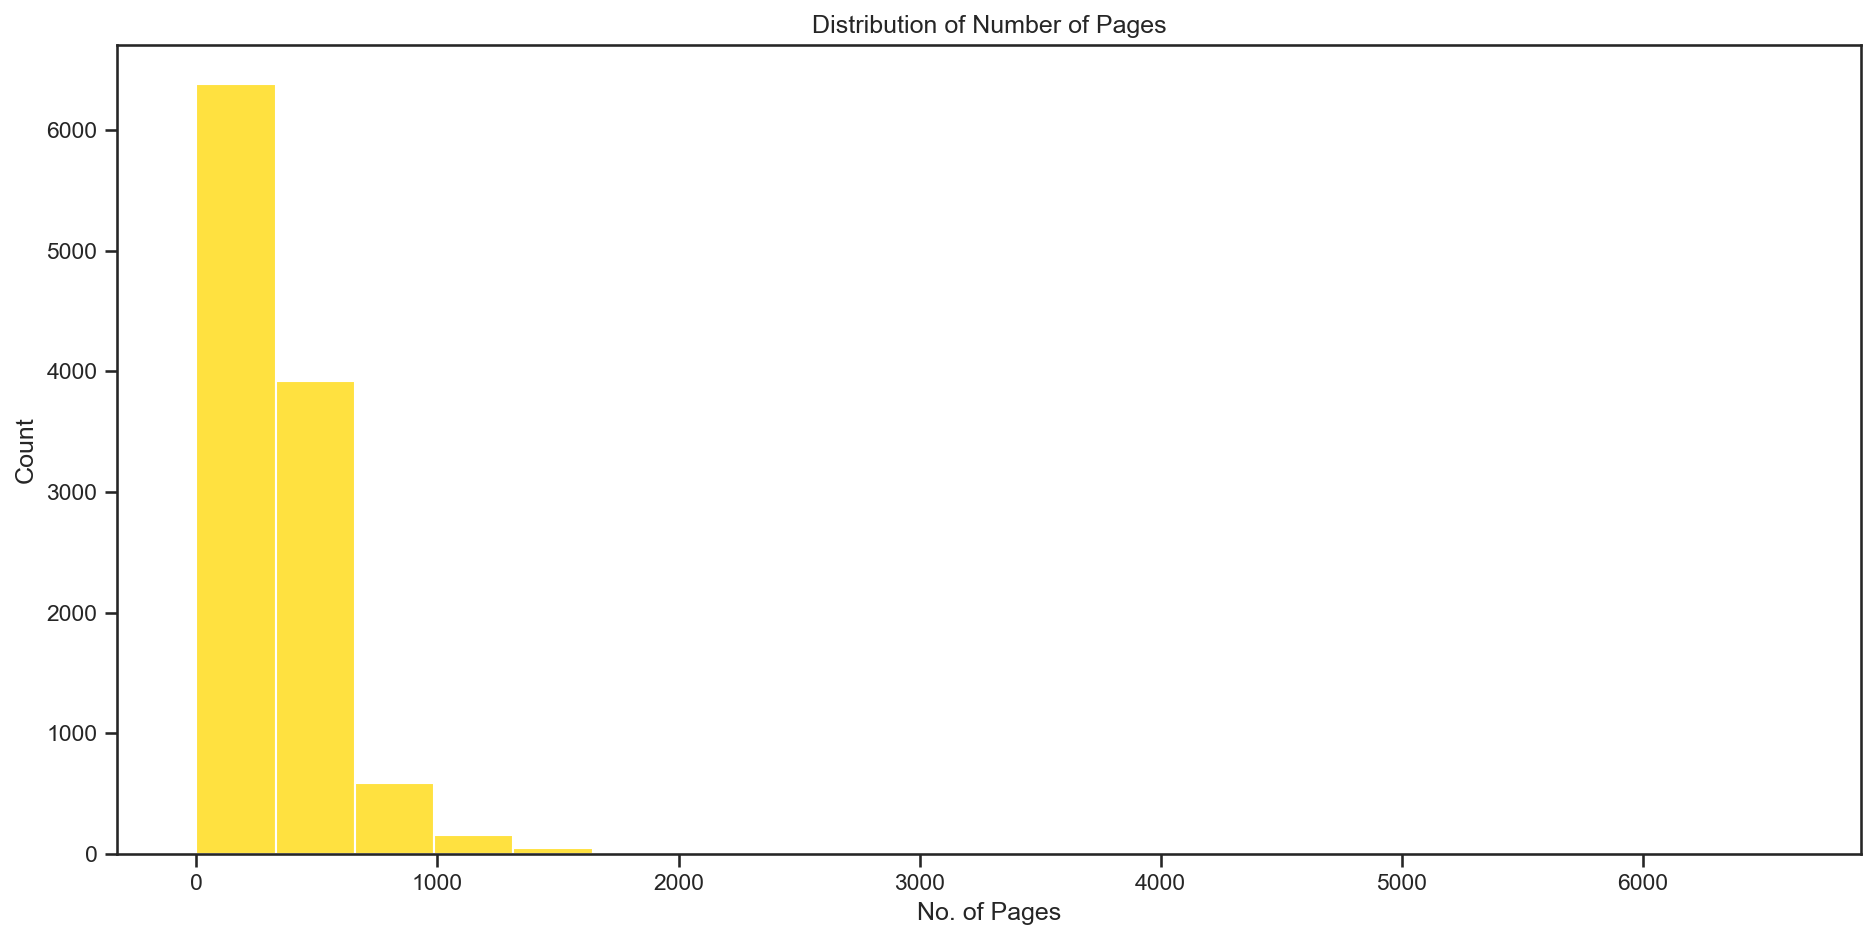

In [23]:
plt.figure(figsize=(15,7))
sns.histplot(df['num_pages'],bins=20,color='gold')
plt.title('Distribution of Number of Pages')
plt.xlabel('No. of Pages')
plt.show()

- Since we want to build a linear regression model, let's look for a few independent variables that have a significant correlation with average ratings

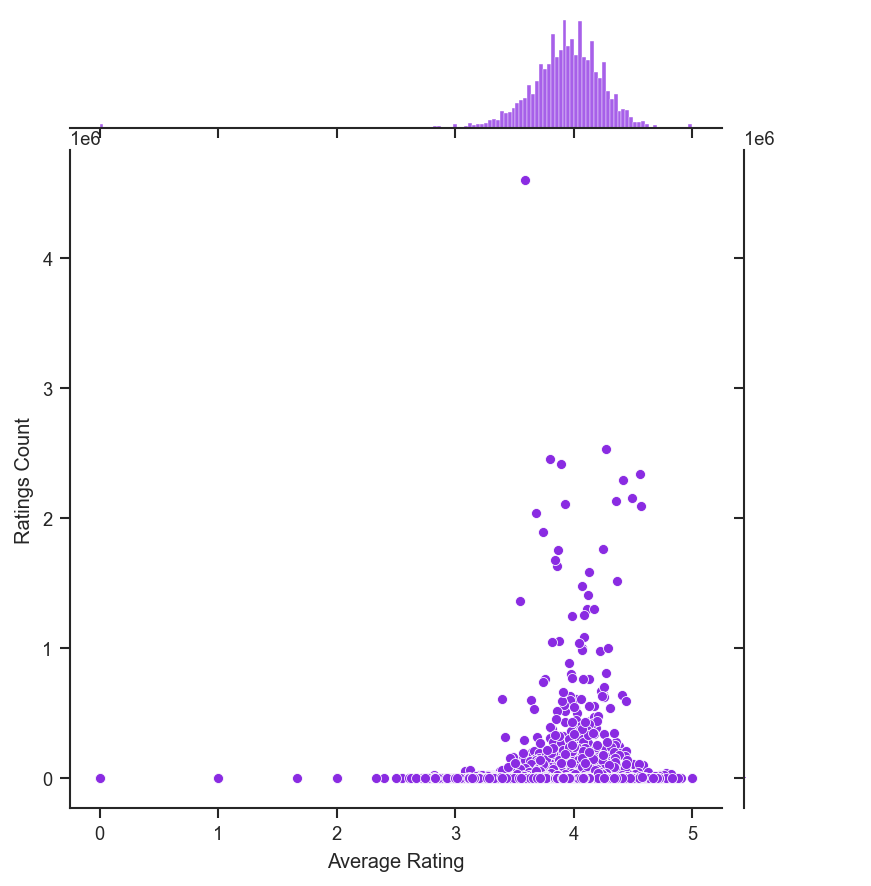

In [24]:
# relationship between average rating and number of rating received
sns.set_context('paper')
ax=sns.jointplot(x='average_rating', y='ratings_count', data =df, color='blueviolet')
ax.set_axis_labels('Average Rating', 'Ratings Count')

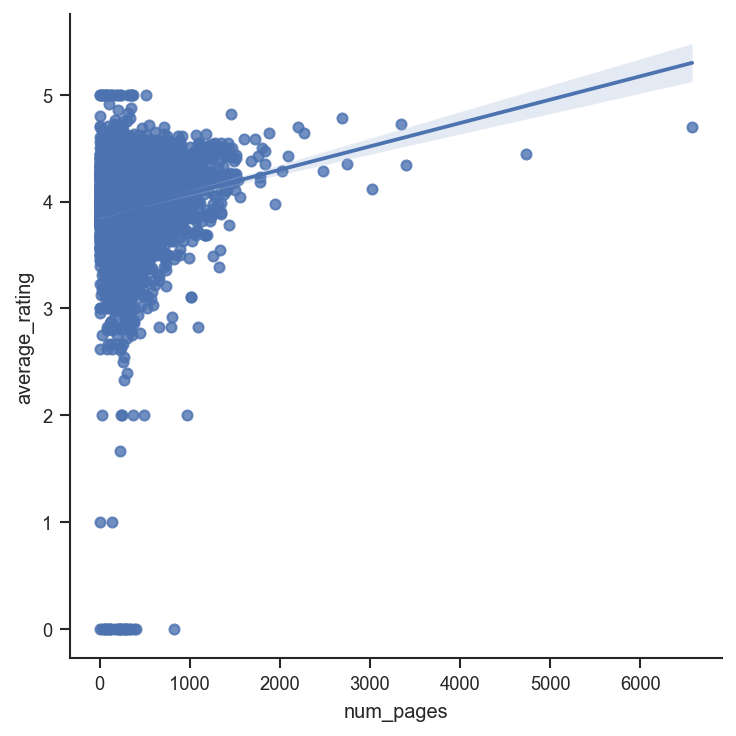

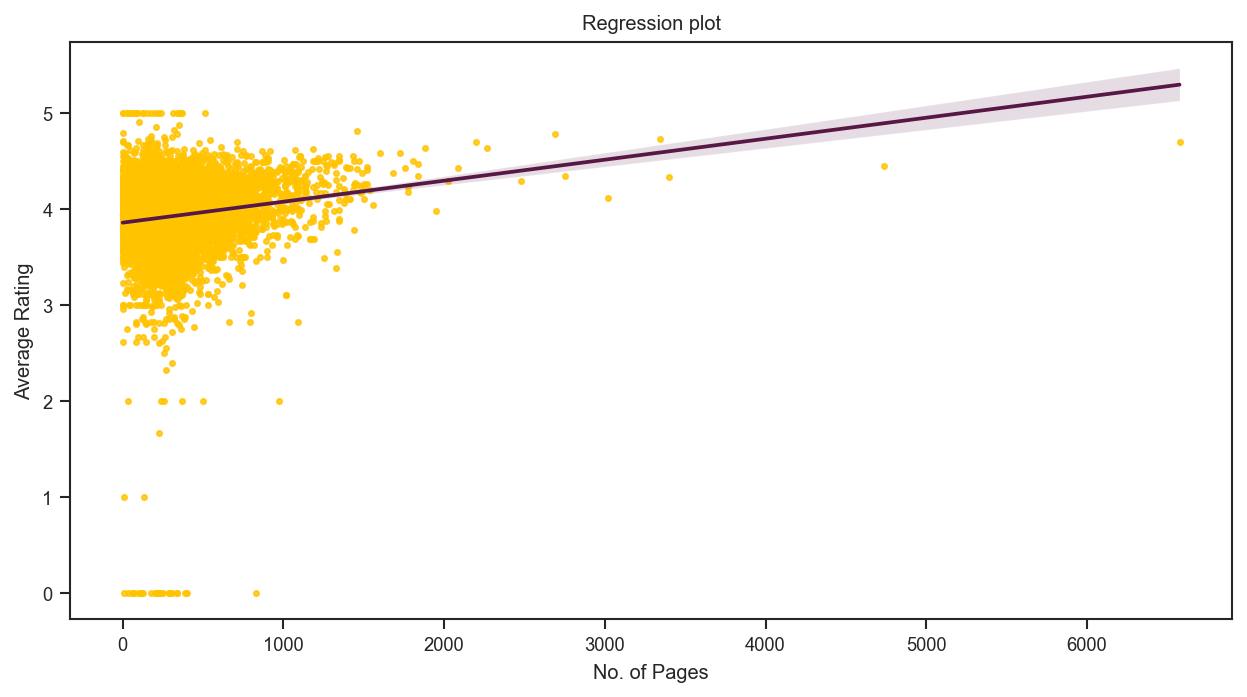

In [25]:
# figure4: We can use the regplot() method from seaborn to see the relationship between num_pages and 'average_rating'
sns.lmplot(x = 'num_pages', y = 'average_rating', data = df)

plt.figure(figsize=(10,5))
sns.regplot(data=df,y="average_rating",x="num_pages",marker='.',scatter_kws={"color": "#FFC300"}, line_kws={"color": "#581845"})
plt.xlabel('No. of Pages')
plt.ylabel('Average Rating')
plt.title("Regression plot")
plt.show()

- From the preceding heatmap, num_pages ( The number of pages the book contains) has the higest positive correlation with average_rating ( The average rating of the book received in total.), so we will take num_pages as a feature (X) and average_rating as a predictor (y) for our linear regression model.
- due to outliers, the whole graph is getting positively skewed so let's plot plot a graph having books with page less than 1000

<AxesSubplot: xlabel='num_pages'>

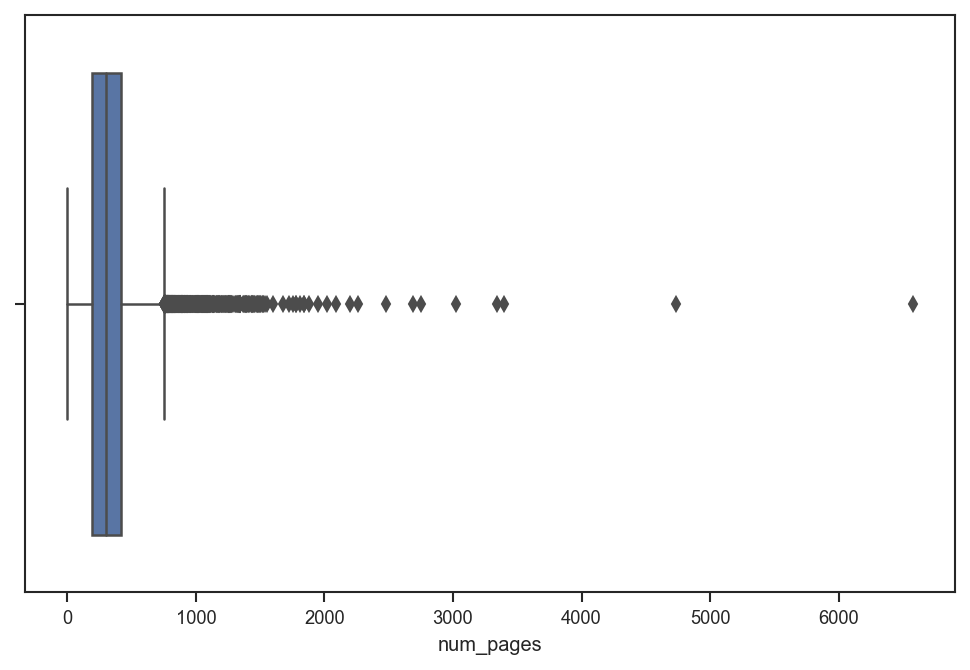

In [26]:
# figure5a : find no. of pages outliers
sns.boxplot(x=df['num_pages'])

- Points between [1,000; 6,000] are outliers as there are not included in the box of other observation i.e no where near the quartiles.

In [30]:
# remove outliers from no. of pages to have a more accurate datase
trial1 = df[~(df['num_pages']>1000)]

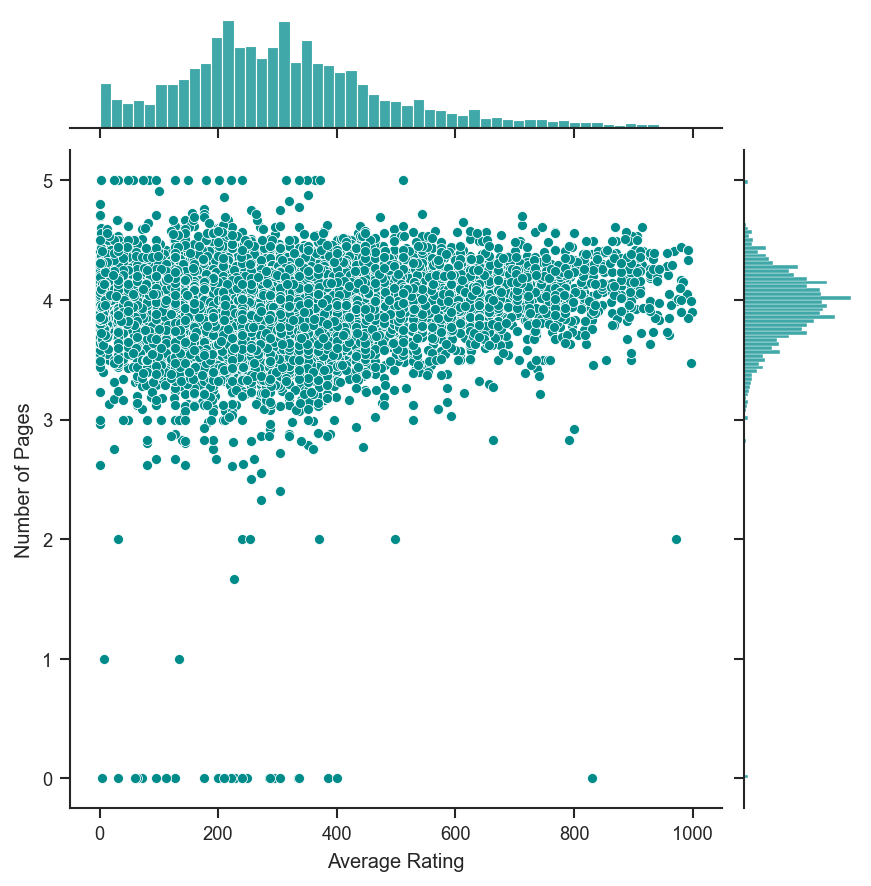

In [31]:
# figure4b: Relation between 'number of pages' above 1000 and 'average ratings'

ax=sns.jointplot(x='num_pages',y='average_rating' , data =trial1, color='darkcyan')
ax.set_axis_labels('Average Rating', 'Number of Pages' )

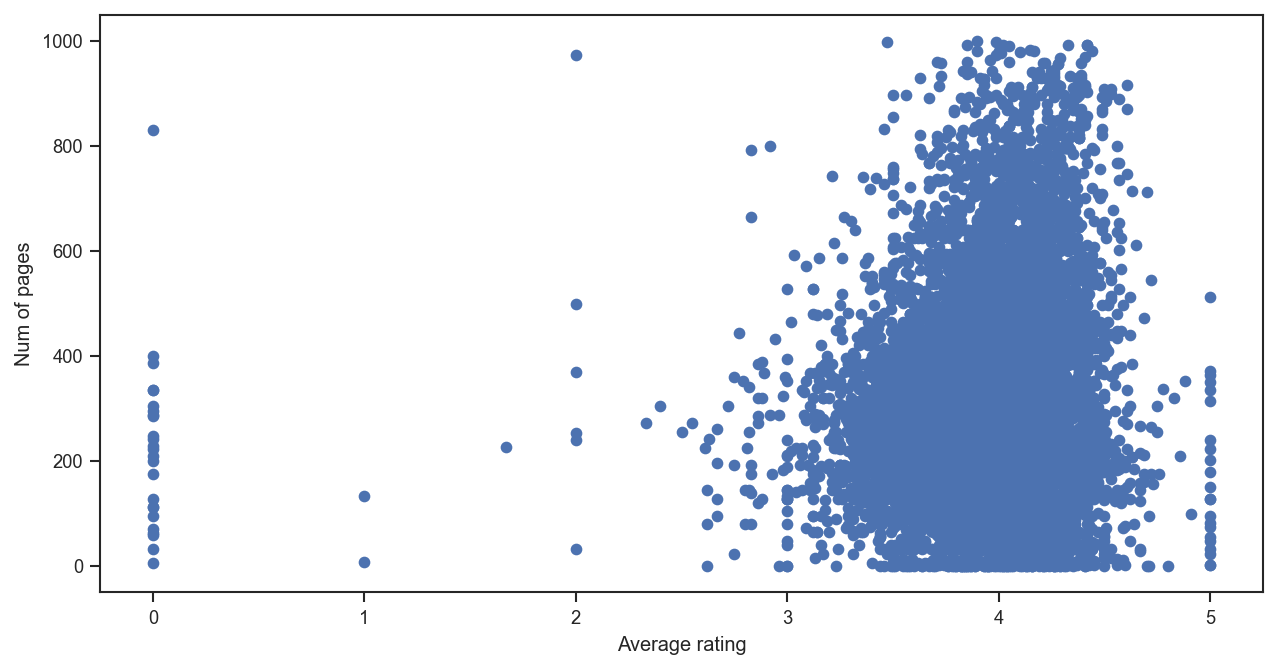

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(trial1.average_rating,trial1.num_pages)
plt.xlabel("Average rating")
plt.ylabel("Num of pages")
plt.show()

- After removing outliers from 'num_pages', we see that votes is concentrated on the range of 3.5 and 4.5.
- English language being everywhere on the graph, meaning that a lot more diverse votes have been allocated for that language.

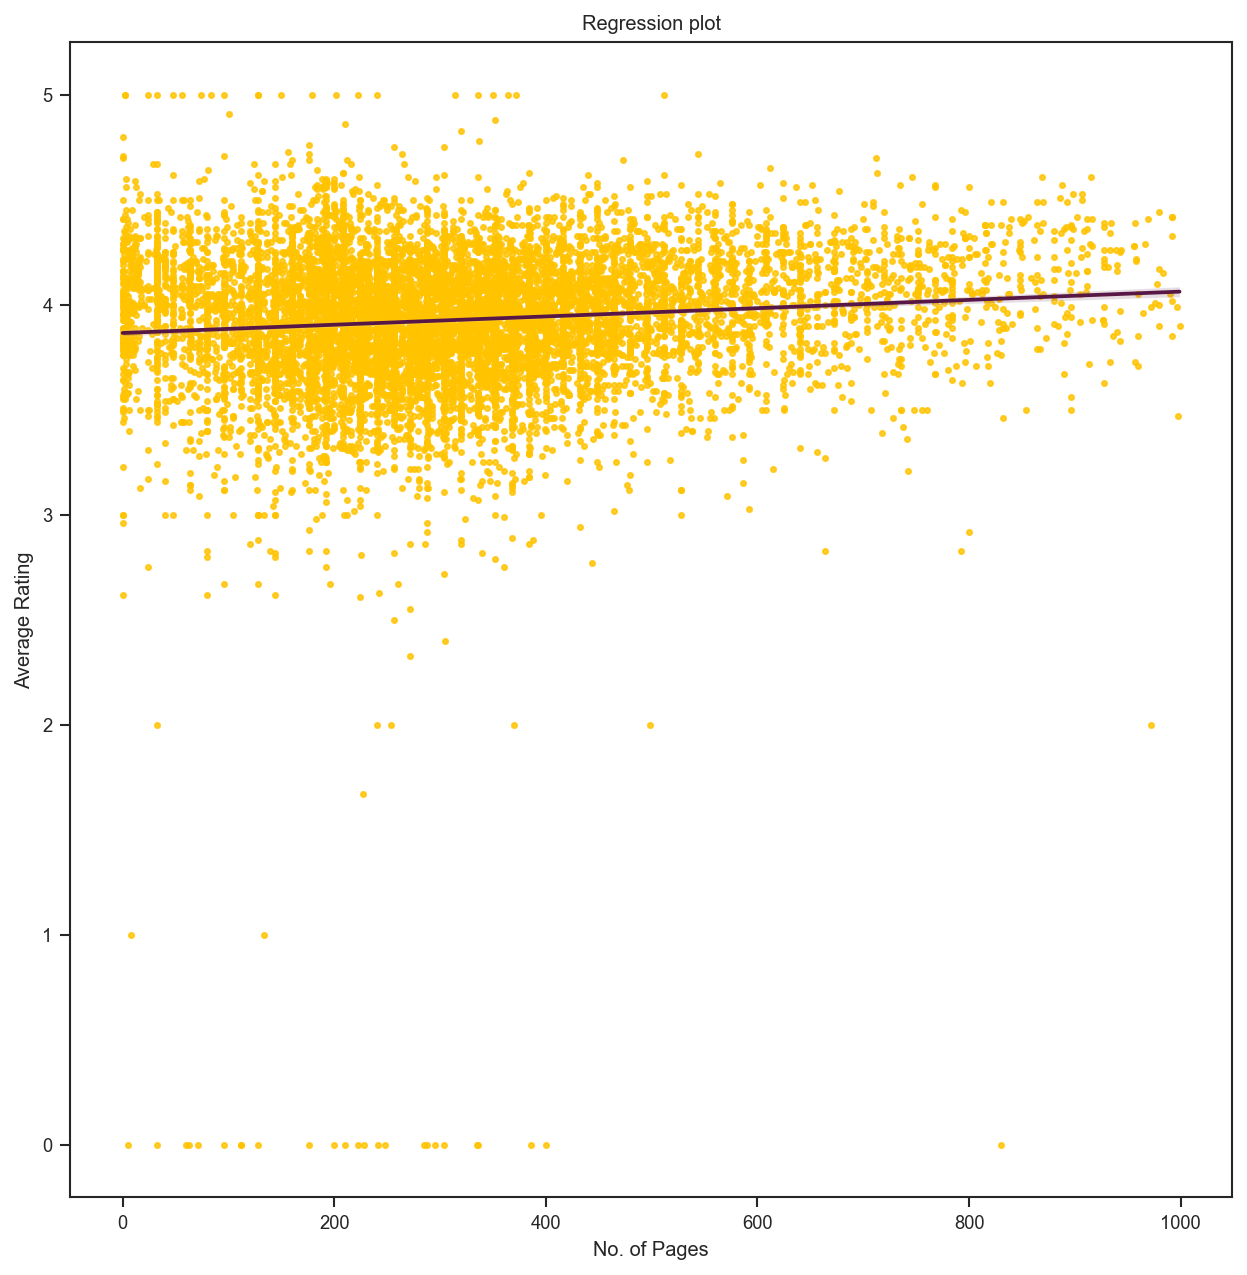

In [33]:
plt.figure(figsize=(10,10))
sns.regplot(data=trial1,y="average_rating",x="num_pages",marker='.',scatter_kws={"color": "#FFC300"}, line_kws={"color": "#581845"})
plt.xlabel('No. of Pages')
plt.ylabel('Average Rating')
plt.title("Regression plot")
plt.show()

<AxesSubplot: xlabel='ratings_count'>

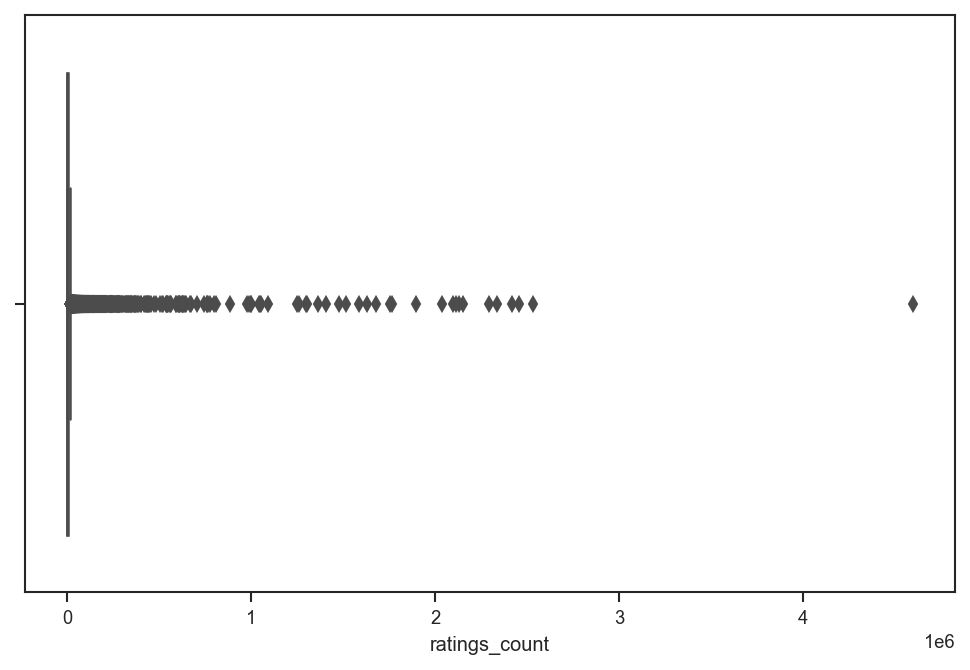

In [34]:
# figure5b :find outliersfrom ratings_count
sns.boxplot(x=df['ratings_count'])

In [35]:
# remove outliers from 'ratings_count'
trial2 = trial1.drop(trial1.index[trial1['ratings_count'] >= 1000000])

<AxesSubplot: xlabel='text_reviews_count'>

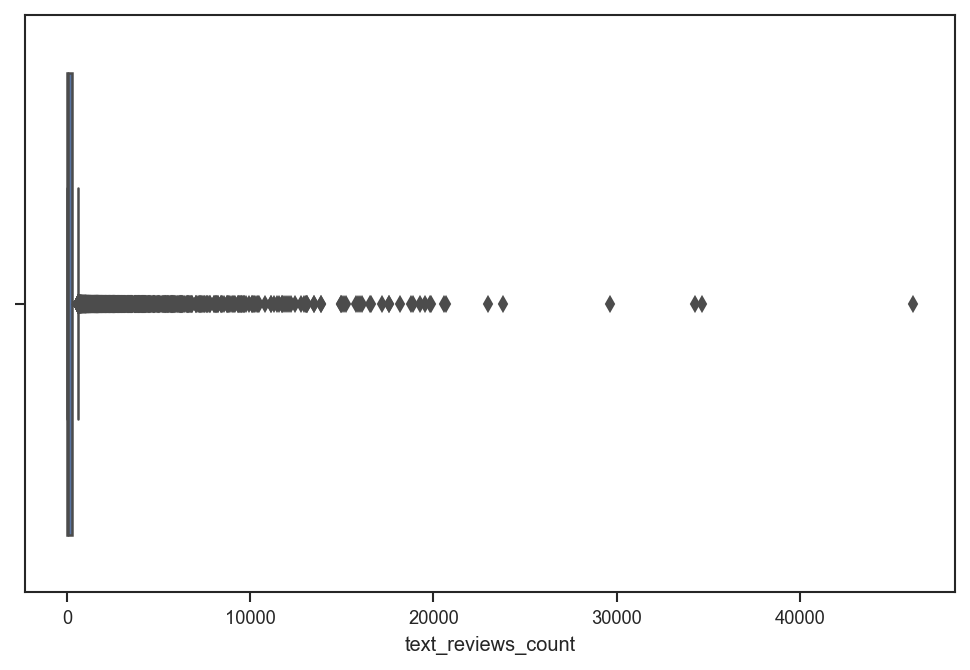

In [36]:
# find no.from 'text_reviews_count'
sns.boxplot(x=trial2['text_reviews_count'])

In [37]:
# remove outliers from text_reviews_count
trial3 = trial2.drop(trial2.index[trial2['text_reviews_count'] >= 20000])

In [38]:
trial3.corr()["average_rating"]

bookID               -0.030138
average_rating        1.000000
isbn13                0.000237
num_pages             0.101494
ratings_count         0.051612
text_reviews_count    0.039568
Name: average_rating, dtype: float64

The correlation with other feature is still almost inexistant encoding categorical variable and formating feature may be a way to improve correlation.

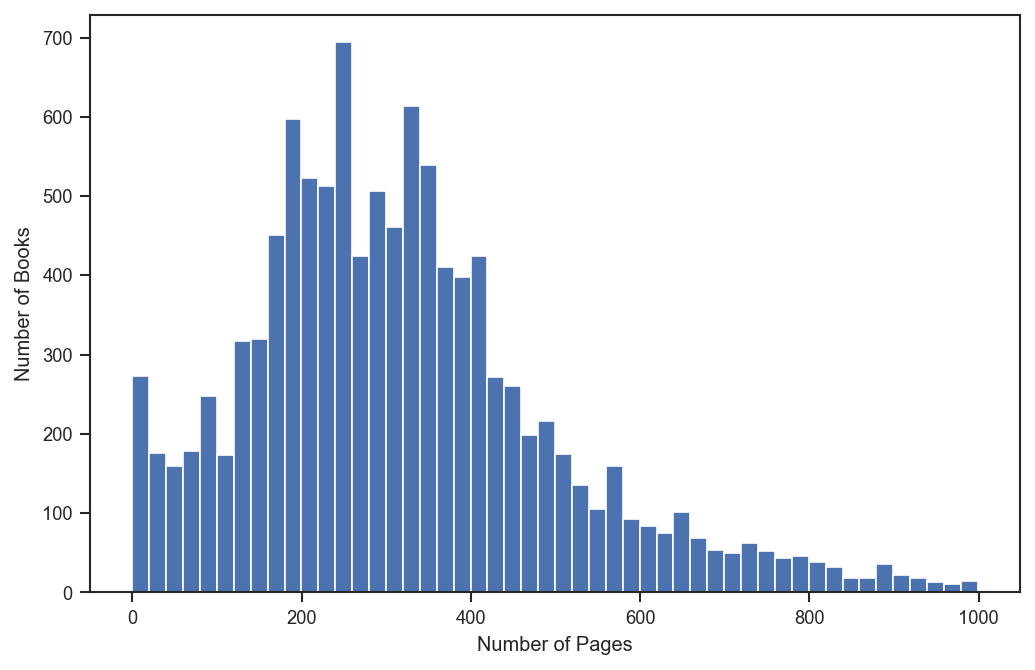

In [41]:
# figure5: Distribution Plot for the Number of Pages
plt.hist(trial3.num_pages,bins=50)
plt.xlabel("Number of Pages")
plt.ylabel("Number of Books")
plt.show()

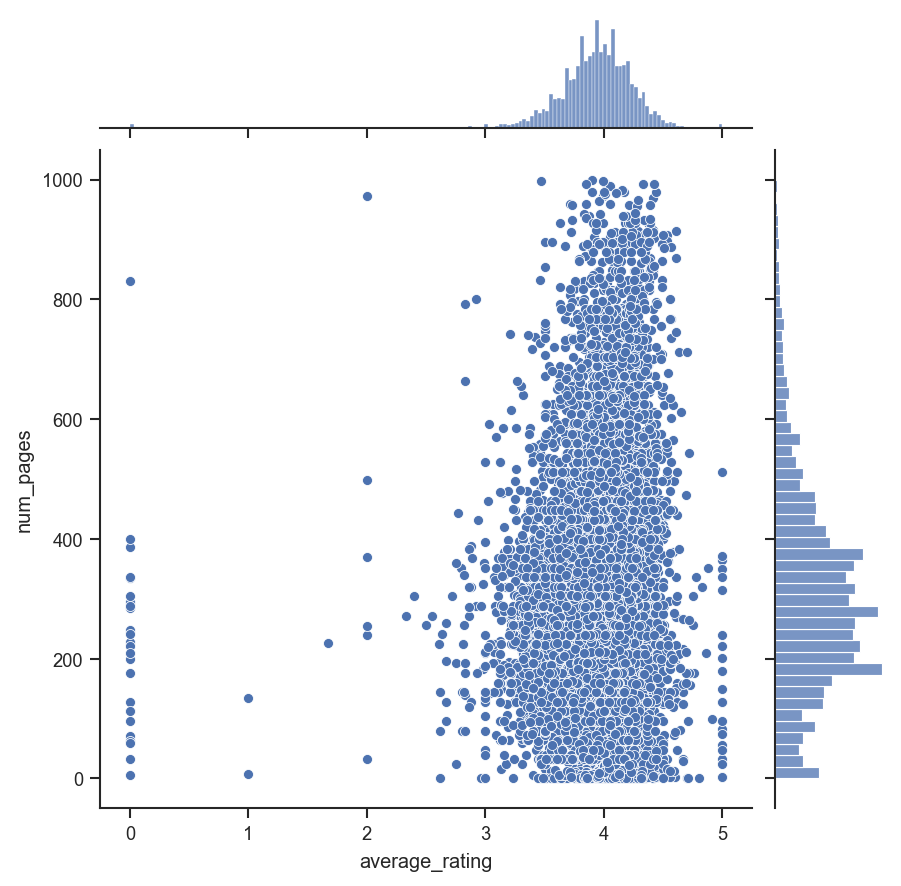

In [42]:
# figure4a: visualise a bivariate distribution between 'average ratings' & 'no. of pages'
sns.jointplot(x = 'average_rating', y = 'num_pages', data = trial3)

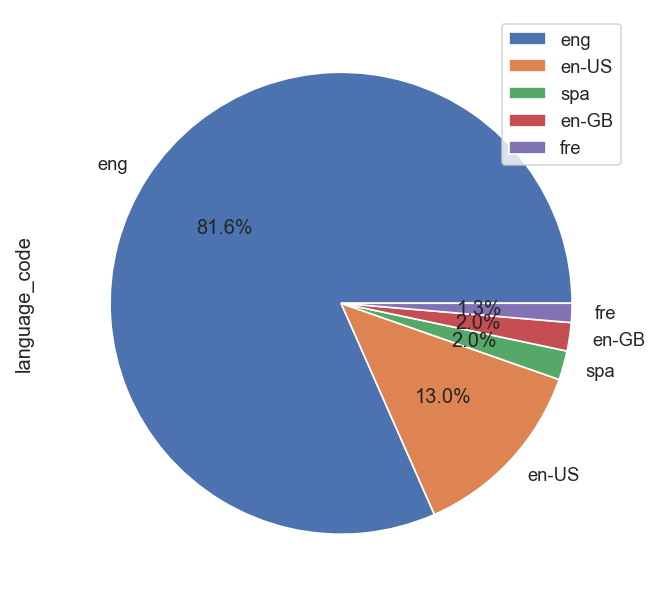

In [43]:
# figure6 : Top language

trial3['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(5, 5)).legend()

- Over 95% of books are in English, which means this variable is nearly constant!

C:\Users\selfe\AppData\Local\Temp\ipykernel_27160\788010612.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=trial3, x=authors['ratings_count'], y=authors.index, ci = None, hue = authors['title'])


Text(0.5, 0, 'Total Ratings')

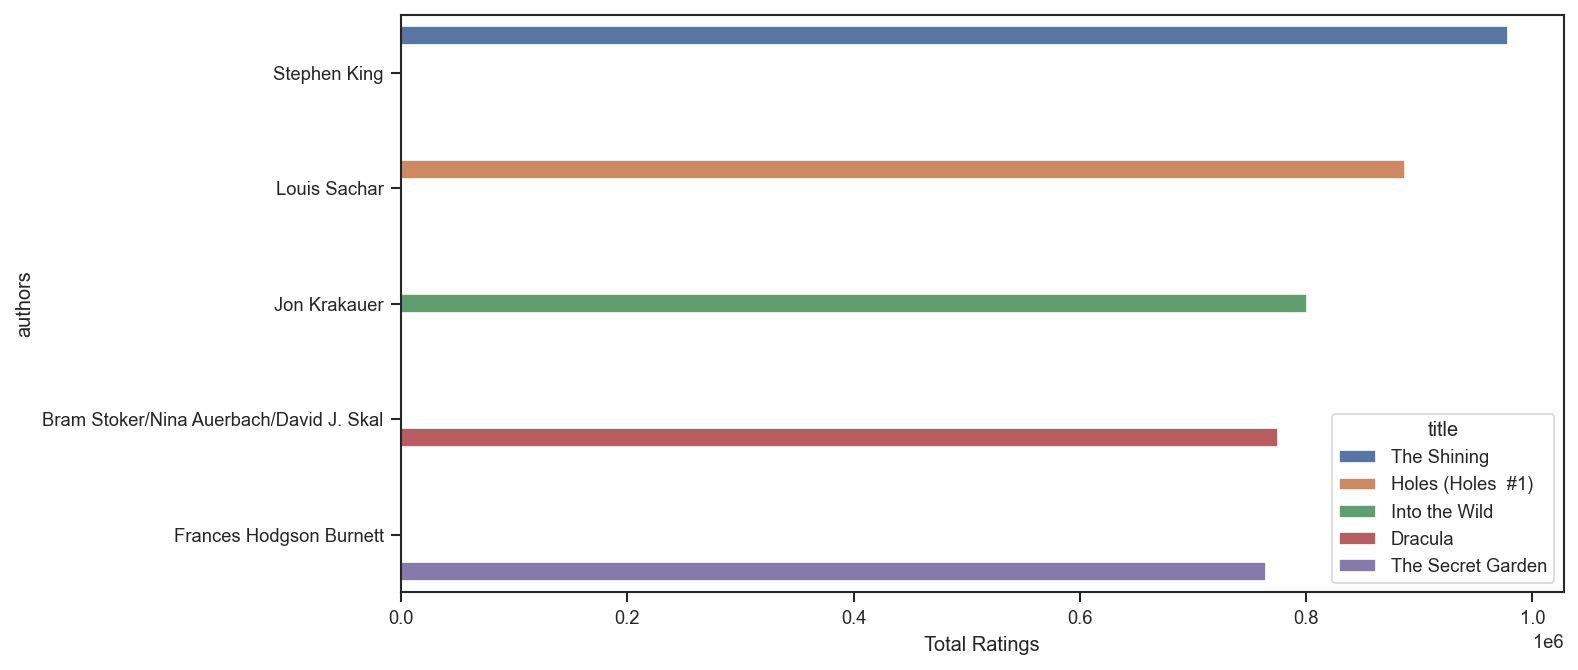

In [45]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = trial3.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(data=trial3, x=authors['ratings_count'], y=authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.89'),
  Text(3, 0, '3.92'),
  Text(4, 0, '3.93'),
  Text(5, 0, '3.94'),
  Text(6, 0, '3.96'),
  Text(7, 0, '3.97'),
  Text(8, 0, '3.98'),
  Text(9, 0, '3.99'),
  Text(10, 0, '4.0'),
  Text(11, 0, '4.02'),
  Text(12, 0, '4.04'),
  Text(13, 0, '4.05'),
  Text(14, 0, '4.07')])

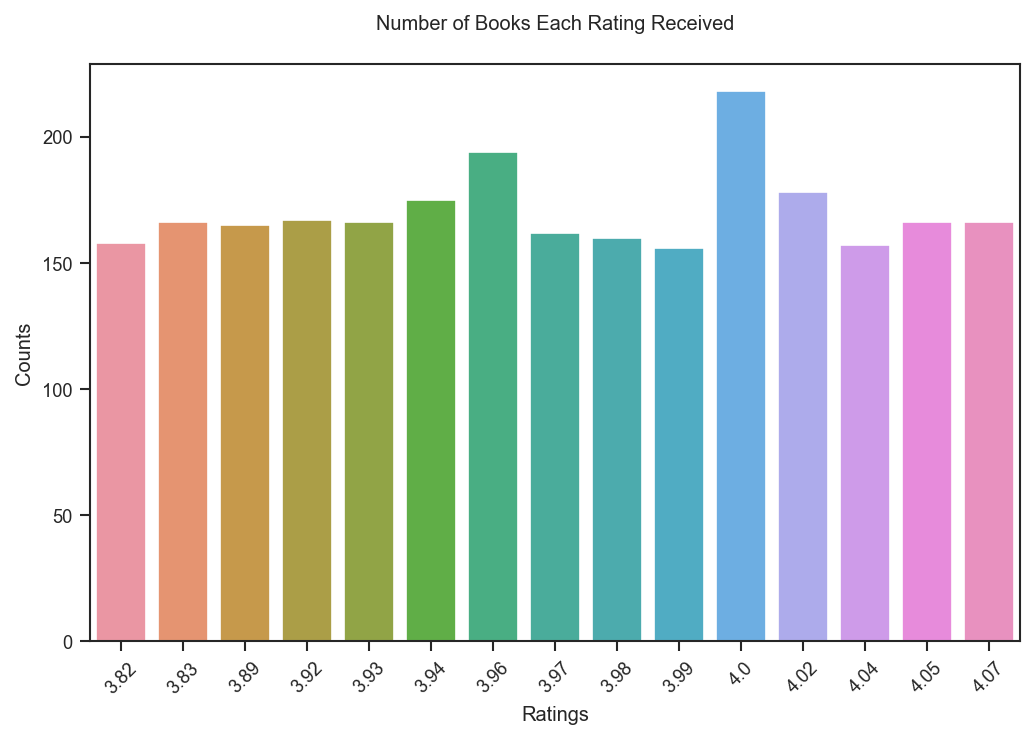

In [46]:
# number of books per rating

sns.barplot(data=trial3 , x =trial3['average_rating'].value_counts().head(15).index, y=trial3['average_rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

<AxesSubplot: xlabel='ratings_count', ylabel='title'>

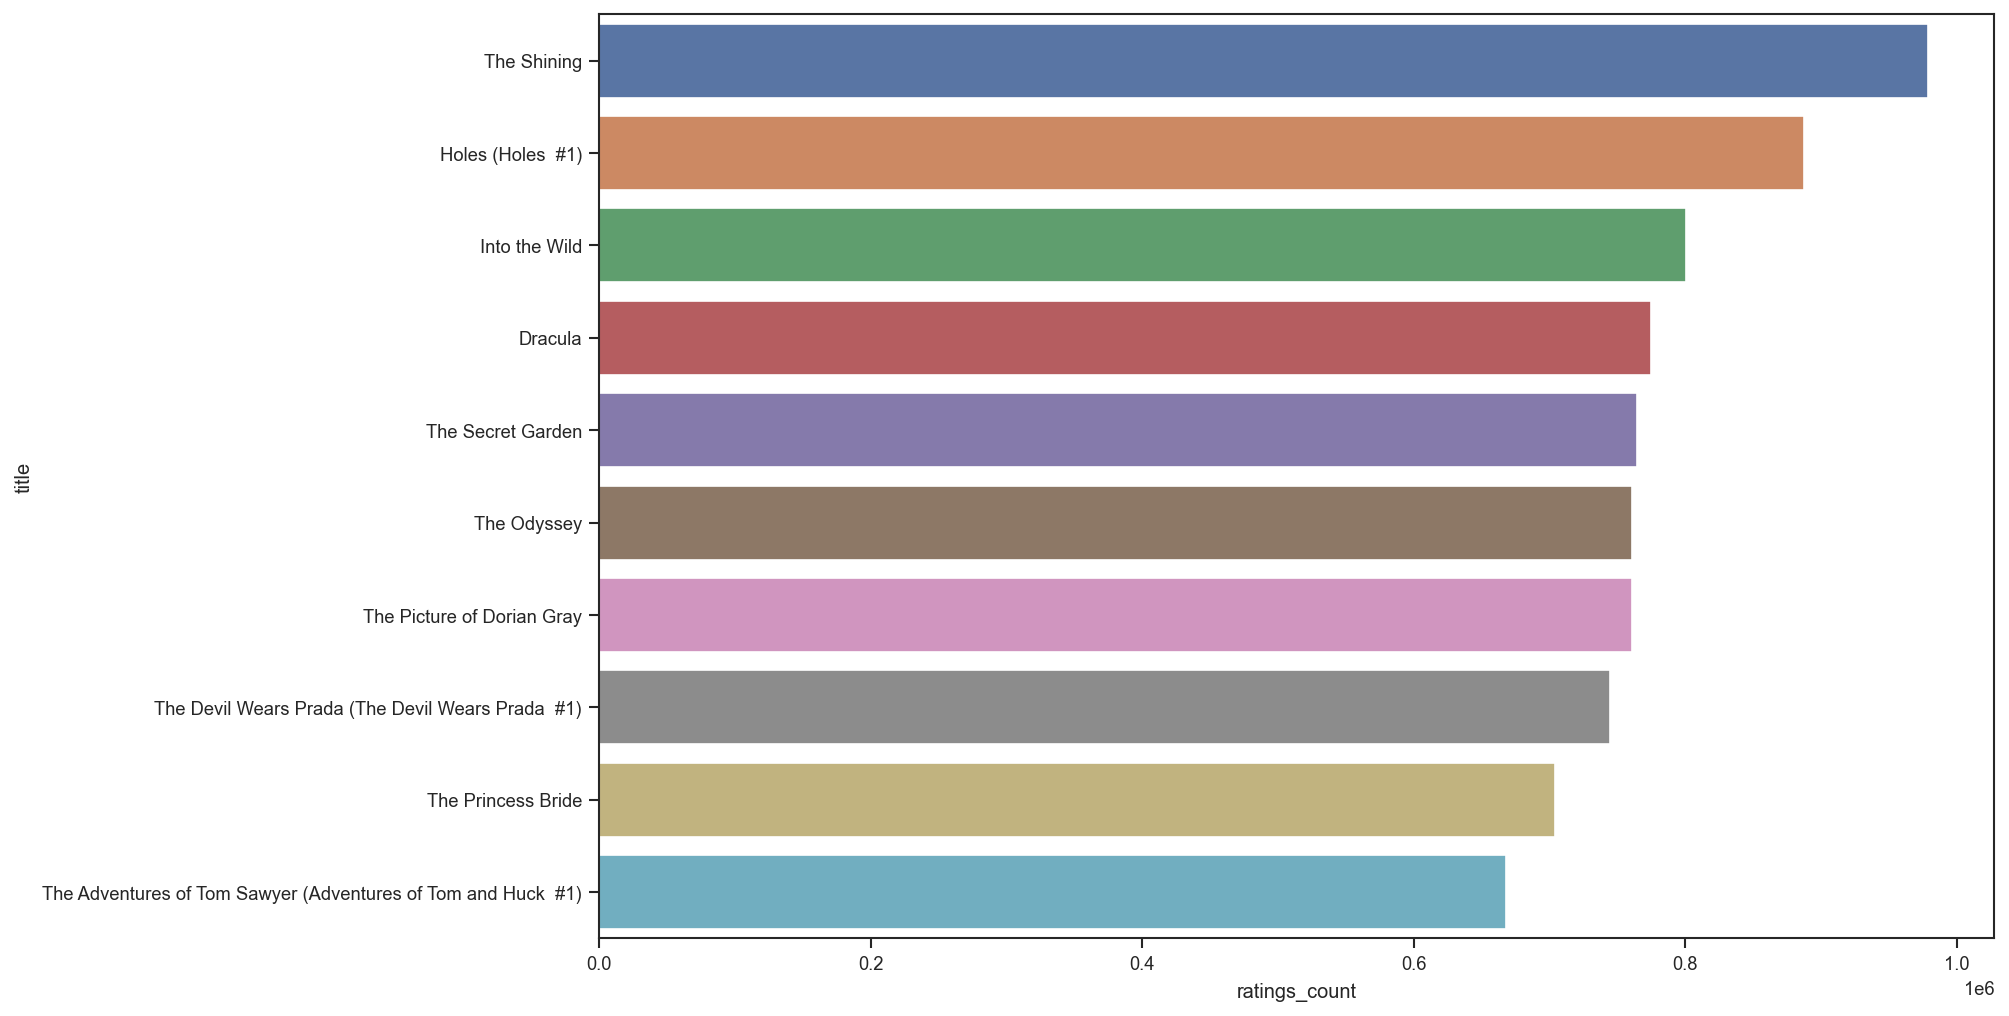

In [47]:
# Let's look at the top 10 rated books
Most_Rated = trial3.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(data=df,  x=Most_Rated, y=Most_Rated.index)

11123


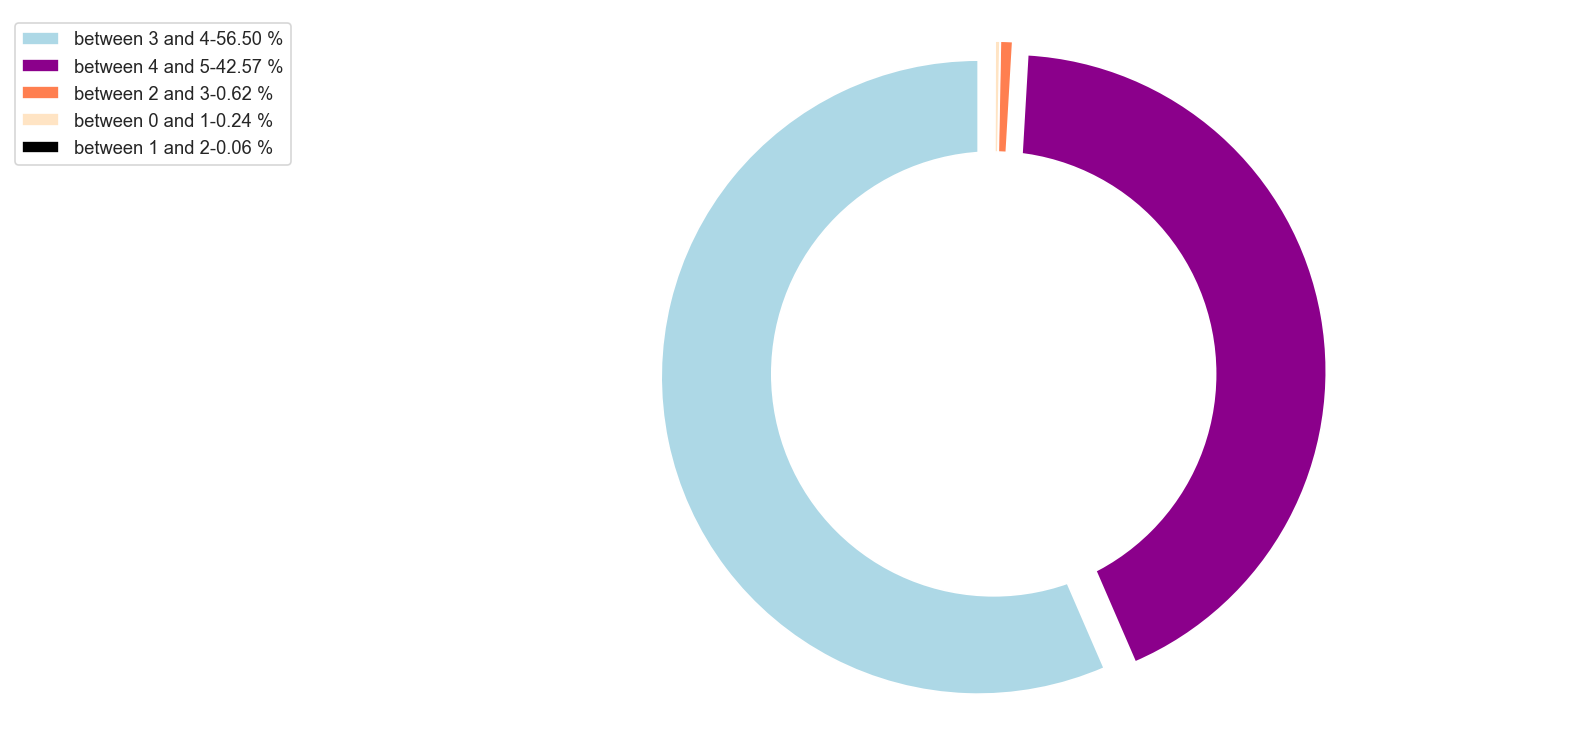

In [48]:
# percentage of books lying between various points

# to see the number of books lying in different point, we try to clasify them.
#The function, segregation below does the same.
#0-1:under average books, 1-2:average books, 2-3: good books, 3-4:very good book, 4-5: excelent books

def segregation(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append('between 0 and 1')
        elif val>1 and val<=2:
            values.append('between 1 and 2')
        elif val>2 and val<=3:
            values.append('between 2 and 3')
        elif val>3 and val<=4:
            values.append('between 3 and 4')
        elif val>4 and val<=5:
            values.append('between 4 and 5')
    print(len(values))
    return values

df['Ratings_Dist']=segregation(df)
ratings_pie = df['Ratings_Dist'].value_counts().reset_index()
labels=ratings_pie['index']
colors = ['lightblue','darkmagenta','coral','bisque','black']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'], colors=colors, pctdistance=0.85, startangle=90, explode=(0.05,0.05,0.05,0.05,0.05))

# drawing a cercle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels=['{0}-{1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend(labels,loc='best', bbox_to_anchor=(-0.1,1.),)

C:\Users\selfe\AppData\Local\Temp\ipykernel_27160\377191302.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  trial3.dropna(0, inplace=True)


<Figure size 2250x1500 with 0 Axes>

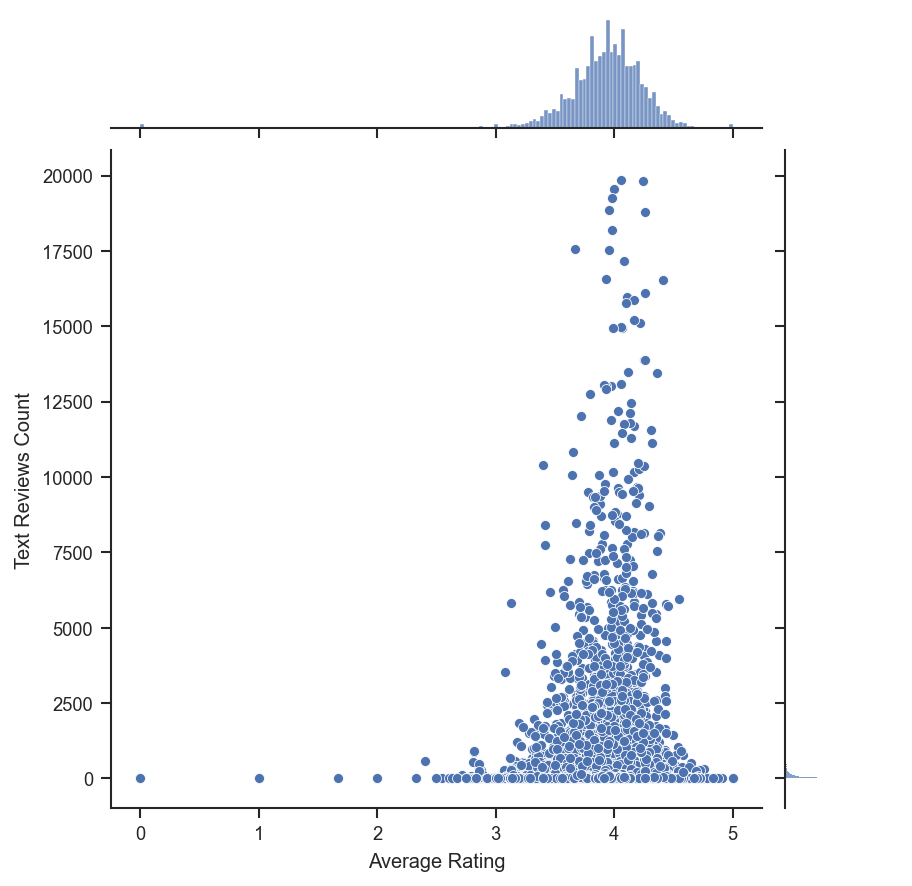

In [49]:
# relation between average_rating and number of reviews
plt.figure(figsize=(15,10))
trial3.dropna(0, inplace=True)
sns.set_context('paper')
ax=sns.jointplot(x='average_rating', y='text_reviews_count', kind='scatter', data =trial3[['text_reviews_count','average_rating']])
ax.set_axis_labels('Average Rating', 'Text Reviews Count')
plt.show()

- very less people gives either above  or below 3 mark

4. FEATURES 

In [50]:
df_processed = trial3.copy()

In [51]:
#display publication_date format
df_processed.publication_date

2         11/1/2003
5         4/26/2005
7         11/1/2005
8         4/30/2002
9          8/3/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 10868, dtype: object

In [52]:
#Change the publication date to float
df_processed['publication_date']=pd.to_datetime(df_processed['publication_date'],format = '%m/%d/%Y',errors='coerce')
df_processed['publication_date'] = pd.to_numeric(df_processed['publication_date'])

In [53]:
# the number of books per language.
df_processed['language_code'].value_counts()

eng      8686
en-US    1386
spa       217
en-GB     211
fre       142
ger        96
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
rus         2
swe         2
nl          1
srp         1
ara         1
msa         1
glg         1
wel         1
nor         1
enm         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [54]:
#  list of different languages assigned to books without duplicates
df_processed['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'en-CA',
       'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp', 'ita',
       'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'enm', 'tur', 'gla',
       'ale'], dtype=object)

In [55]:
# top 5 most used languages:
df_processed['language_code'].value_counts().head()

eng      8686
en-US    1386
spa       217
en-GB     211
fre       142
Name: language_code, dtype: int64

- Most of the books in our Data set are in 'eng','en-US',en-GB, 'spa', 'fre'

In [56]:
from sklearn import preprocessing

# encoding (convert into numerical column) categorical column
le = preprocessing.LabelEncoder()

df_processed['title'] = le.fit_transform(df_processed['title'])
df_processed['authors'] = le.fit_transform(df_processed['authors'])
df_processed['language_code'] = le.fit_transform(df_processed['language_code'])
df_processed['publisher'] = le.fit_transform(df_processed['publisher'])  

In [57]:
df_processed.corr()["average_rating"].sort_values(ascending=False)

average_rating        1.000000
num_pages             0.101494
ratings_count         0.051612
text_reviews_count    0.039568
language_code         0.033250
publisher             0.027967
title                 0.021896
authors               0.020324
isbn13                0.000237
publication_date     -0.027870
bookID               -0.030138
Name: average_rating, dtype: float64

In [58]:
df_processed.corr()

,bookID,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,1.000000,0.010018,-0.004073,-0.030138,-0.001933,0.004274,-0.011116,-0.093162,-0.102853,0.016376,-0.037184
title,0.010018,1.000000,0.027991,0.021896,-0.018201,-0.038333,0.002452,-0.004287,-0.008428,0.001437,0.027752
authors,-0.004073,0.027991,1.000000,0.020324,-0.027974,-0.001824,-0.001849,0.006284,-0.015141,0.003194,0.037019
average_rating,-0.030138,0.021896,0.020324,1.000000,0.000237,0.033250,0.101494,0.051612,0.039568,-0.027870,0.027967
isbn13,-0.001933,-0.018201,-0.027974,0.000237,1.000000,0.011471,0.008419,0.010907,0.013068,-0.000402,0.017818
language_code,0.004274,-0.038333,-0.001824,0.033250,0.011471,1.000000,0.032180,-0.023126,-0.036343,0.022213,0.019722
num_pages,-0.011116,0.002452,-0.001849,0.101494,0.008419,0.032180,1.000000,0.061234,0.070028,-0.013957,0.007708
ratings_count,-0.093162,-0.004287,0.006284,0.051612,0.010907,-0.023126,0.061234,1.000000,0.859257,0.053128,-0.004608
text_reviews_count,-0.102853,-0.008428,-0.015141,0.039568,0.013068,-0.036343,0.070028,0.859257,1.000000,0.079748,0.004576
publication_date,0.016376,0.001437,0.003194,-0.027870,-0.000402,0.022213,-0.013957,0.053128,0.079748,1.000000,-0.008265


- there is no improvement in the correlation, we'll drop the irrelevant future

4. MACHINE LEARNING

In [62]:
# Copy of the data frame
df_Model = df_processed.copy()


In [63]:
# delete unused columns 
df_Model = df_Model.drop(['title', 'authors', 'language_code','publisher','isbn','isbn13','publication_date'],  axis = 1)

In [64]:
# divide the data into attributes 'X' and labels 'y'
X = df_Model
y = df_Model ['average_rating']

In [65]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =60)

In [66]:
X_train.shape

(8694, 5)

In [67]:
print(df_Model.average_rating.mean())
print(X_train.average_rating.mean())
print(X_test.average_rating.mean())

3.9281137283768652
3.929784909132742
3.921430542778288


In [68]:
print(df_Model.ratings_count.mean())
print(X_train.ratings_count.mean())
print(X_test.ratings_count.mean())

12615.395933014353
12479.103289625029
13160.441122355105


In [70]:
print(df_Model.text_reviews_count.mean())
print(X_train.text_reviews_count.mean())
print(X_test.text_reviews_count.mean())

429.74457121825543
427.5315159880377
438.5947562097516


In [72]:
X_trainb = X_train.loc[:,['num_pages','ratings_count','text_reviews_count']].values
y_trainb = X_train.average_rating.values

In [73]:
X_testb = X_test.loc[:,['num_pages','ratings_count','text_reviews_count']].values
y_testb = X_test.average_rating.values

5.A Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression

# regression model
lr_model = LinearRegression()
# Fitting the training data to our model
lr_model.fit(X_trainb,y_trainb)

LinearRegression()

In [75]:
# prediction for the test data set.
y_testb_predicted_lr = lr_model.predict(X_testb)

5.B Mean Squared Error Model

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
# calculate the error between predictions values and the reals values.
print('Linear Regression Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_lr)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_lr)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_lr)))

Linear Regression Report
MAE: 0.2254449857110434
MSE: 0.11520725517822142
R^2: 0.0069625785905107485


5.C Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor()
DT_reg.fit(X_trainb,y_trainb)

DecisionTreeRegressor()

In [79]:
y_testb_predicted_dt = DT_reg.predict(X_testb)

In [80]:
print('Decision Tree Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_dt)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_dt)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_dt)))

Decision Tree Report
MAE: 0.3144495553511193
MSE: 0.2051985945006644
R^2: -0.7687243988633063


5.D Random Forest Regression Model

In [81]:
#Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor()
RF_reg.fit(X_trainb,y_trainb)

RandomForestRegressor()

In [82]:
y_testb_predicted_rf = RF_reg.predict(X_testb)

In [83]:
print('Random Forest Regressor Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_rf)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_rf)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_rf)))

Random Forest Regressor Report
MAE: 0.23071771125136234
MSE: 0.11839140406675544
R^2: -0.020483427277455446


5.E Random Forest Regression Model

In [84]:
# Lasso Regression Model
from sklearn.linear_model import Lasso

Lasso_reg = Lasso()
Lasso_reg.fit(X_trainb,y_trainb)

Lasso()

In [85]:
y_testb_predicted_las = Lasso_reg.predict(X_testb)

In [86]:
print('Lasso Regressor Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_las)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_las)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_las)))

Lasso Regressor Report
MAE: 0.22519860050913124
MSE: 0.11513148119073002
R^2: 0.007615718056701137


6. CONCLUSION